<a href="https://colab.research.google.com/github/KanishkValechha/mental-health-ai/blob/main/codementalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python Libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import KFold

In [ ]:
url = "https://raw.githack.com/KanishkValechha/mental-health-ai/main/mxmh_survey_results1.csv"
dataset = pd.read_csv(url)
print(dataset)


               Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732     11-01-2022 22:26  18.0                   Spotify            1.0   
733     11-03-2022 23:24  19.0   Other streaming service            6.0   
734     11-04-2022 17:31  19.0                   Spotify            5.0   
735     11-09-2022 01:55  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer          Favgenre Exploratory  \
0             Yes      

In [ ]:
#Checking dataset
dataset.shape

(736, 33)

In [ ]:
dataset.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Favgenre                         object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Favgenre                      736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
dataset.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,729,09-01-2022 15:24,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Favgenre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [ ]:
#Removing outerlines
age_index = dataset[(dataset['Age'] > 70)].index
dataset = dataset.drop(age_index, axis=0)

In [ ]:
hpd_index = dataset[dataset['Hours per day'] >= 15].index
dataset = dataset.drop(hpd_index, axis=0)

In [ ]:
data_index = dataset[dataset['BPM'] > 200].index
dataset = dataset.drop(data_index, axis=0)

In [ ]:
#Removing Not Needed Columns
dataset.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)



In [ ]:
#checking th correlation
corr_data = dataset.corr()['Age']
corr_data.sort_values()

<ipython-input-103-4c54a977631b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = dataset.corr()['Age']


Anxiety         -0.147222
OCD             -0.123097
Hours per day   -0.098354
Depression      -0.087602
BPM             -0.019868
Insomnia         0.039365
Age              1.000000
Name: Age, dtype: float64

<ipython-input-104-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

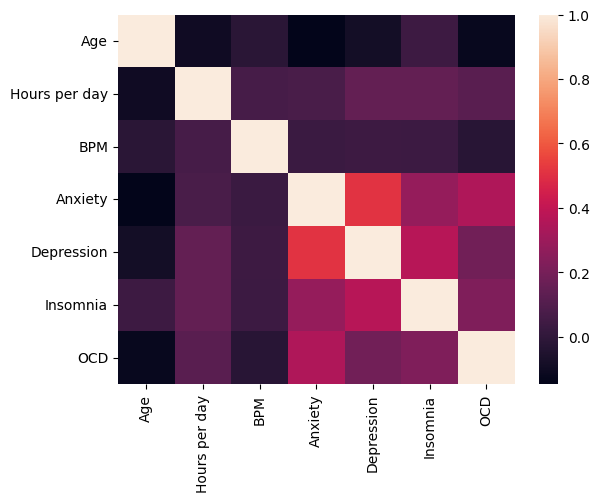

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
#removing missing values
dataset.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Favgenre                          0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [ ]:
dataset['Age'] = dataset['Age'].fillna(round(dataset['Age'].mean(), 0))
dataset['Primary streaming service'] = dataset['Primary streaming service'].fillna(dataset['Primary streaming service'].mode()[0])
dataset['While working'] = dataset['While working'].fillna(dataset['While working'].mode()[0])
dataset['Instrumentalist'] = dataset['Instrumentalist'].fillna(dataset['Instrumentalist'].mode()[0])
dataset['Composer'] = dataset['Composer'].fillna(dataset['Composer'].mode()[0])
dataset['Foreign languages'] = dataset['Foreign languages'].fillna(dataset['Foreign languages'].mode()[0])
dataset['Musiceffects'] = dataset['Musiceffects'].fillna(dataset['Musiceffects'].mode()[0])

In [ ]:
miss_bpm = dataset[dataset['BPM'].isnull() == True]
miss_bpm

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Favgenre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Musiceffects
10,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [ ]:
miss_bpm['Favgenre'].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [ ]:
miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

In [ ]:
for i in miss_bpm_genre:
  dataset['BPM'] = dataset['BPM'].fillna(round(dataset[dataset['Favgenre']== i ]['BPM'].mean(), 0))

In [ ]:
#Data visulization

<Axes: xlabel='Age', ylabel='Count'>

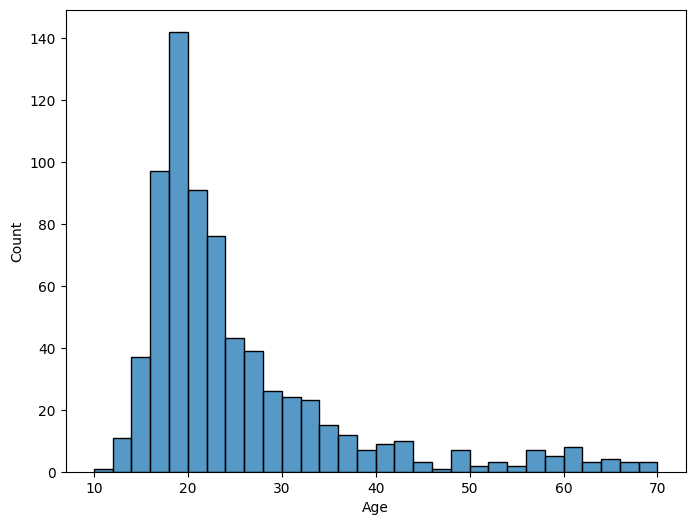

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(dataset['Age'])

<Axes: xlabel='Hours per day', ylabel='Count'>

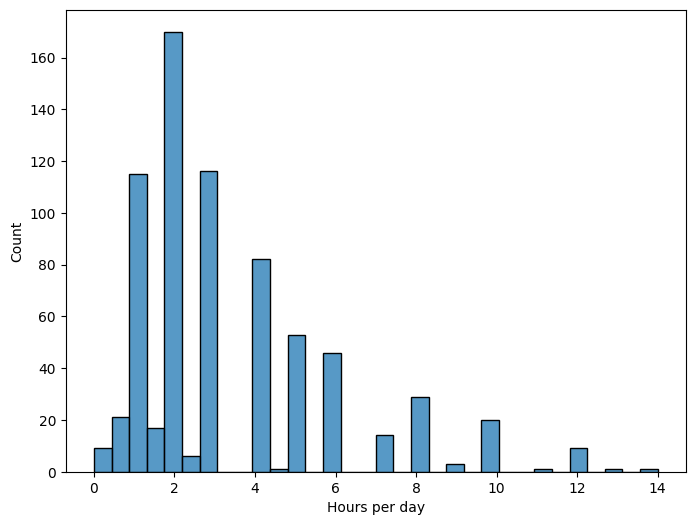

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(dataset['Hours per day'])

<Axes: xlabel='BPM', ylabel='Count'>

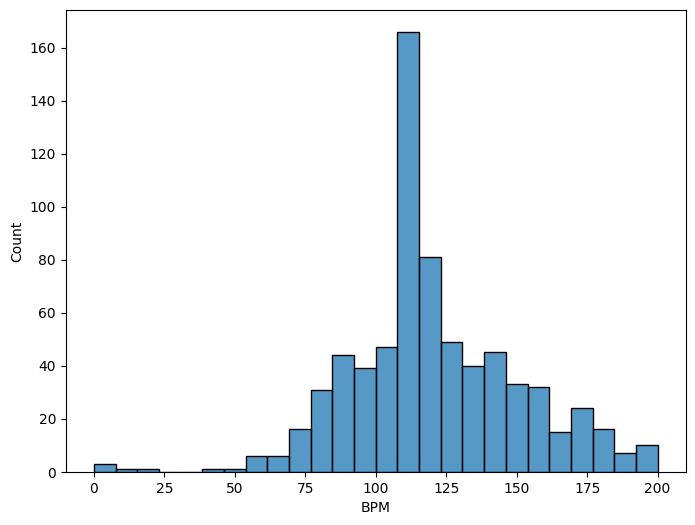

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(dataset['BPM'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spotify'),
  Text(1, 0, 'Pandora'),
  Text(2, 0, 'YouTube Music'),
  Text(3, 0, 'I do not use a streaming service.'),
  Text(4, 0, 'Apple Music'),
  Text(5, 0, 'Other streaming service')])

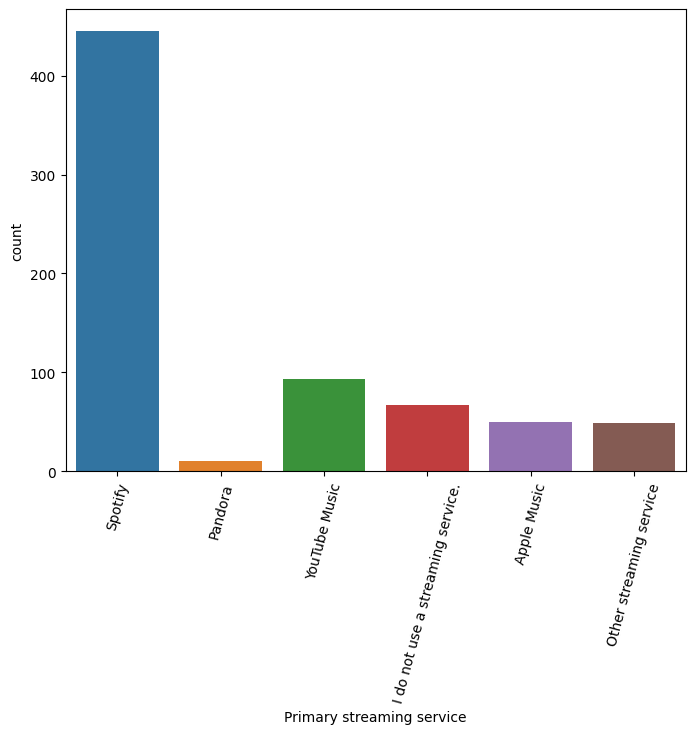

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Primary streaming service'])
plt.xticks(rotation=75)

<Axes: xlabel='While working', ylabel='count'>

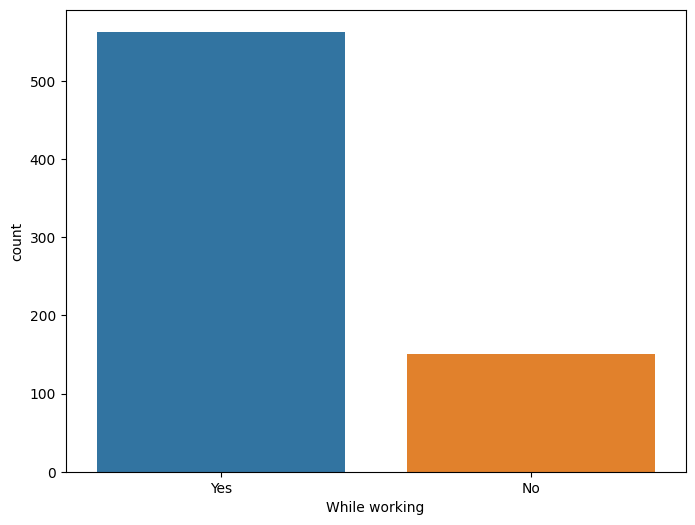

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['While working'])

Text(0.5, 0, 'Classical Music')

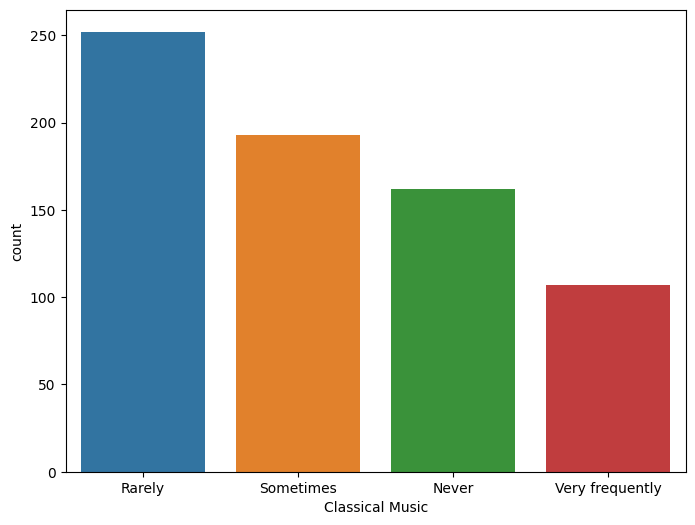

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Classical]'])
plt.xlabel('Classical Music')

Text(0.5, 0, 'Country Music')

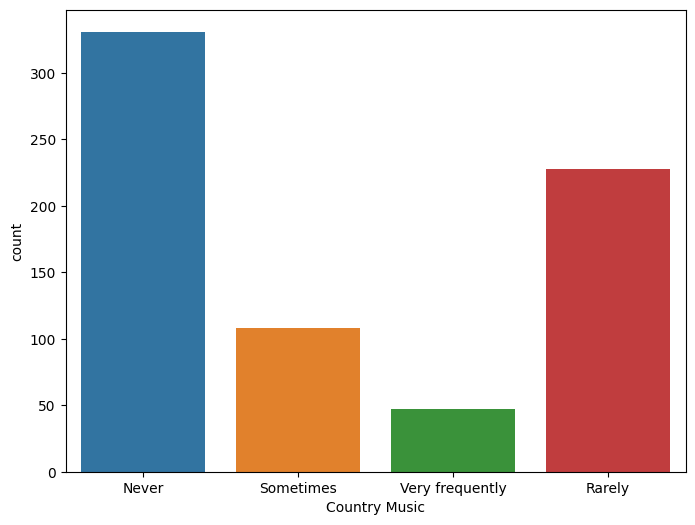

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Country]'])
plt.xlabel('Country Music')

Text(0.5, 0, 'EDM Music')

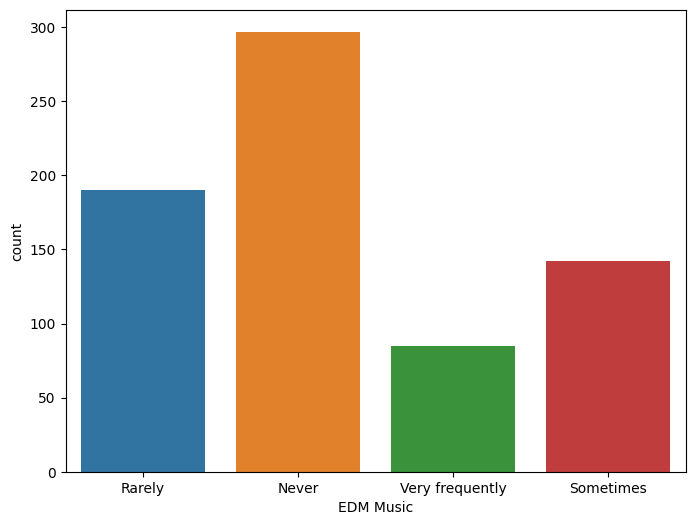

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [EDM]'])
plt.xlabel('EDM Music')

Text(0.5, 0, 'Folk Music')

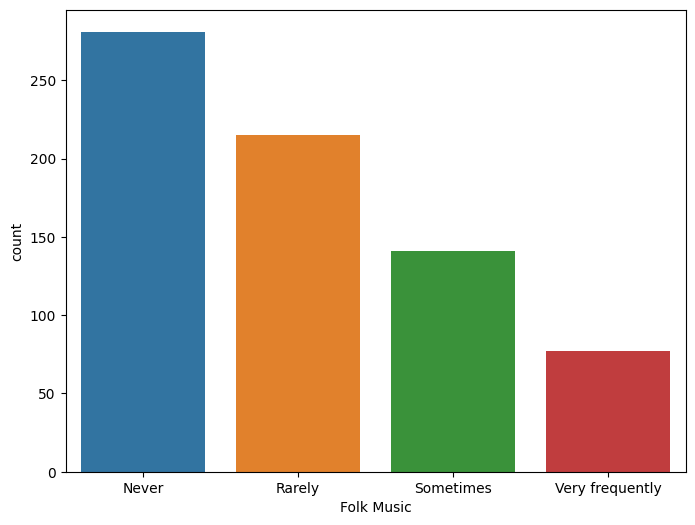

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Folk]'])
plt.xlabel('Folk Music')

Text(0.5, 0, 'Gospel Music')

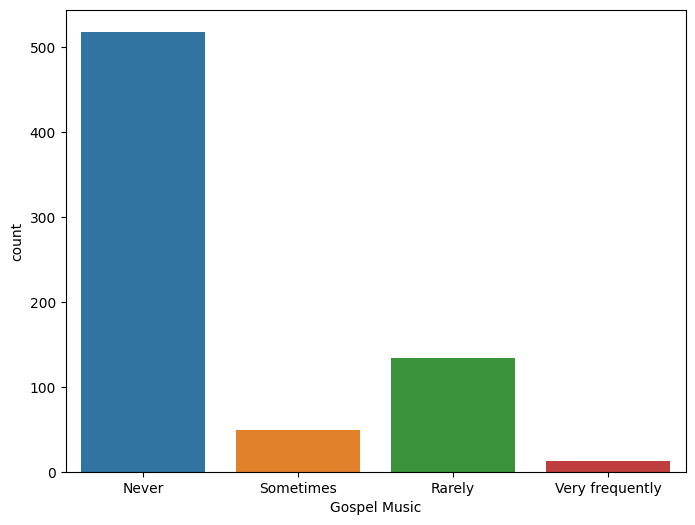

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Gospel]'])
plt.xlabel('Gospel Music')

Text(0.5, 0, 'Hip Hop Music')

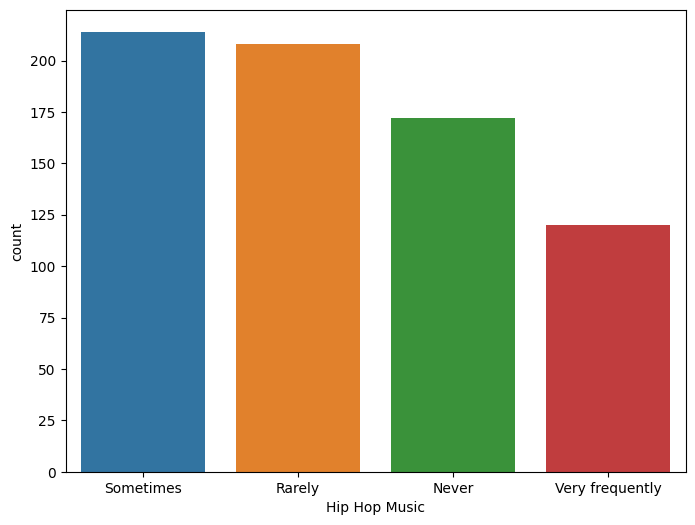

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Hip hop]'])
plt.xlabel('Hip Hop Music')

Text(0.5, 0, 'Jazz Music')

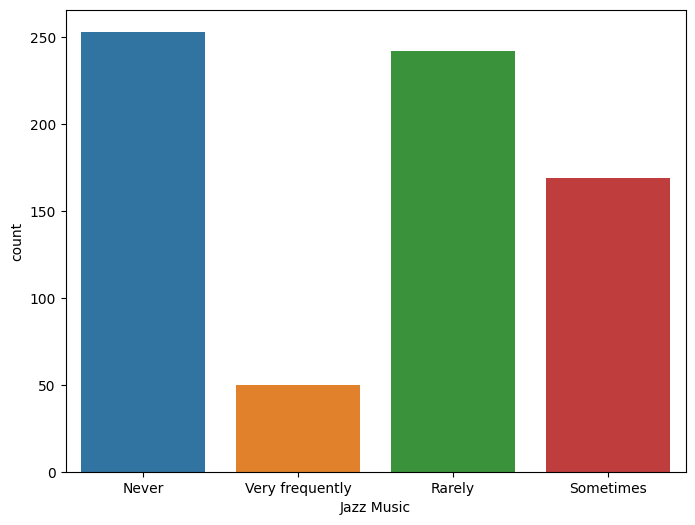

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Jazz]'])
plt.xlabel('Jazz Music')

Text(0.5, 0, 'K Pop Music')

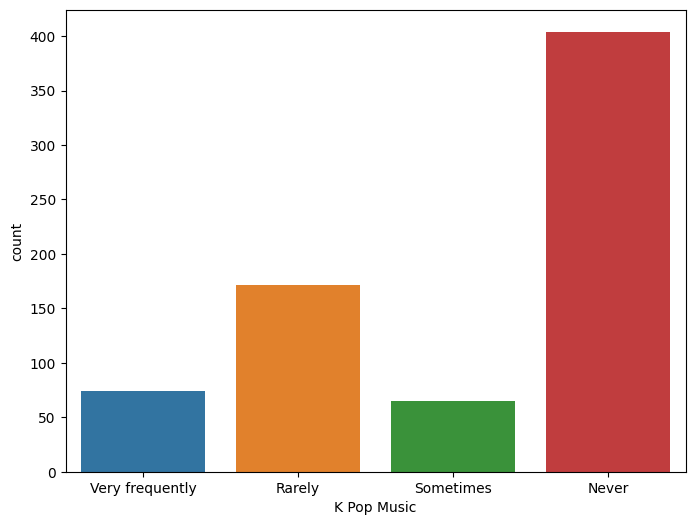

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [K pop]'])
plt.xlabel('K Pop Music')

Text(0.5, 0, 'Latin Music')

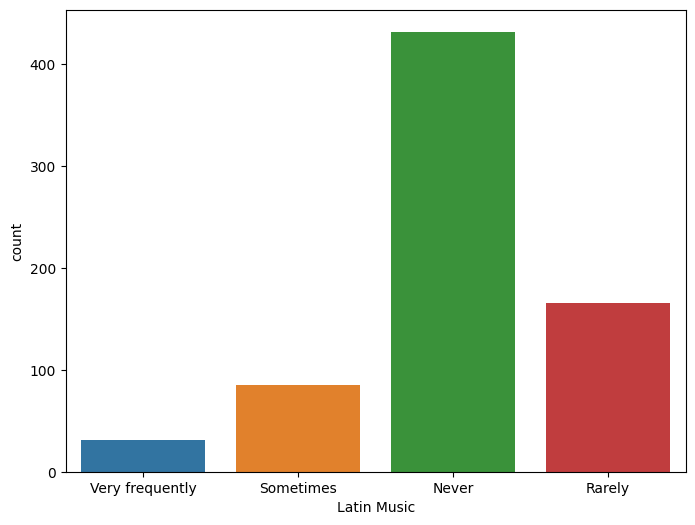

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Latin]'])
plt.xlabel('Latin Music')

Text(0.5, 0, 'Lofi Music')

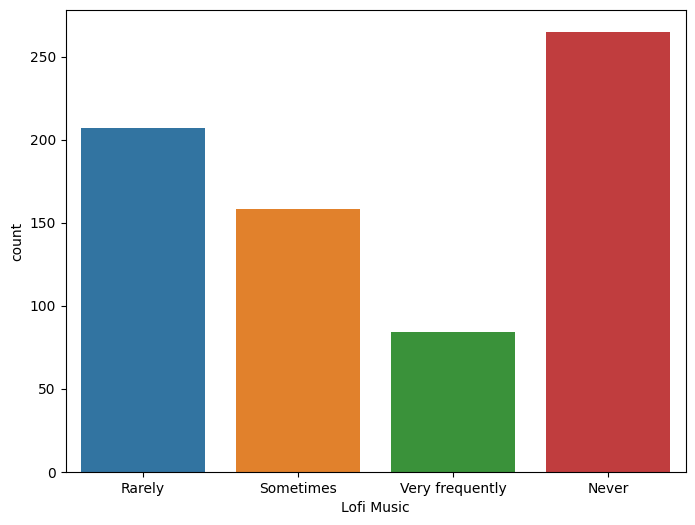

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Lofi]'])
plt.xlabel('Lofi Music')

Text(0.5, 0, 'Metal Music')

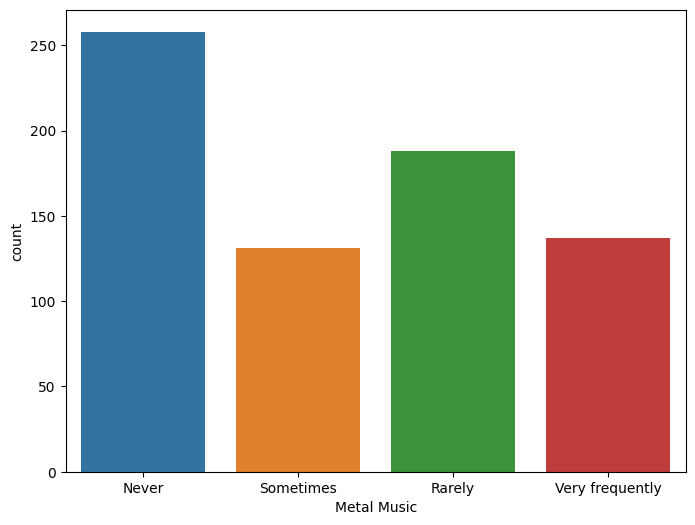

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Metal]'])
plt.xlabel('Metal Music')

Text(0.5, 0, 'Pop Music')

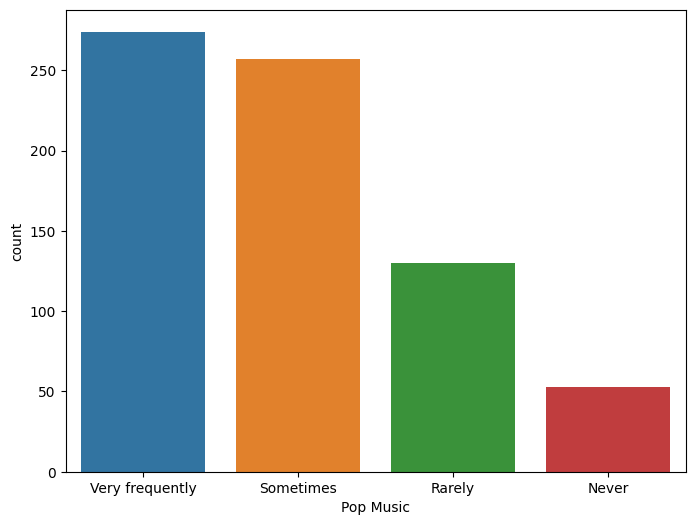

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Pop]'])
plt.xlabel('Pop Music')

Text(0.5, 0, 'R&B Music')

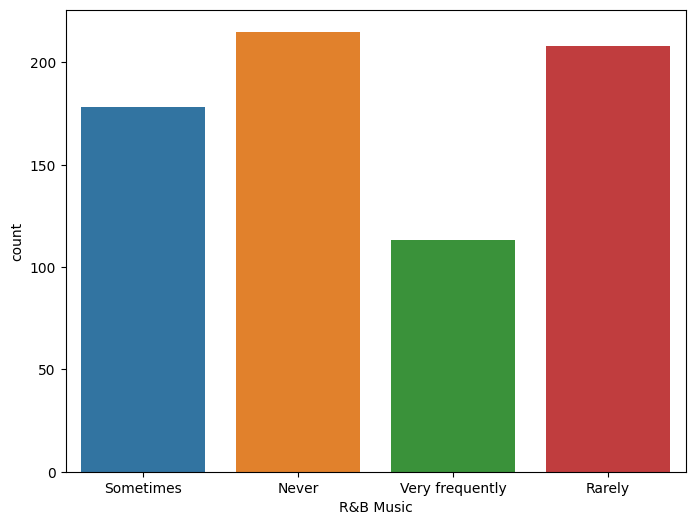

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [R&B]'])
plt.xlabel('R&B Music')

Text(0.5, 0, 'Rap Music')

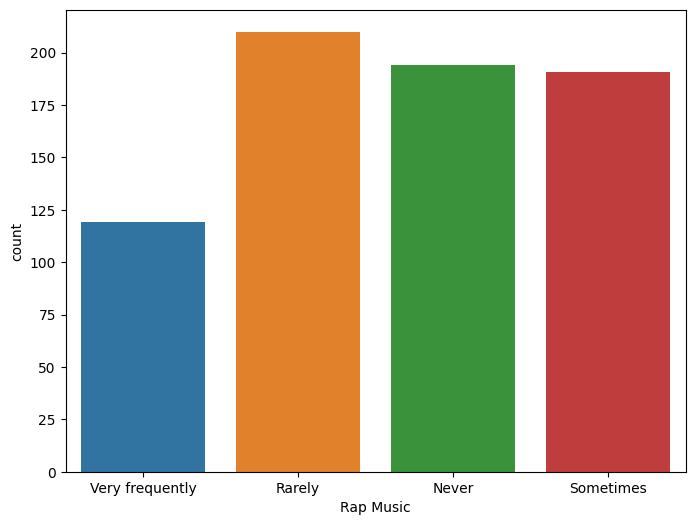

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Rap]'])
plt.xlabel('Rap Music')

Text(0.5, 0, 'Rock Music')

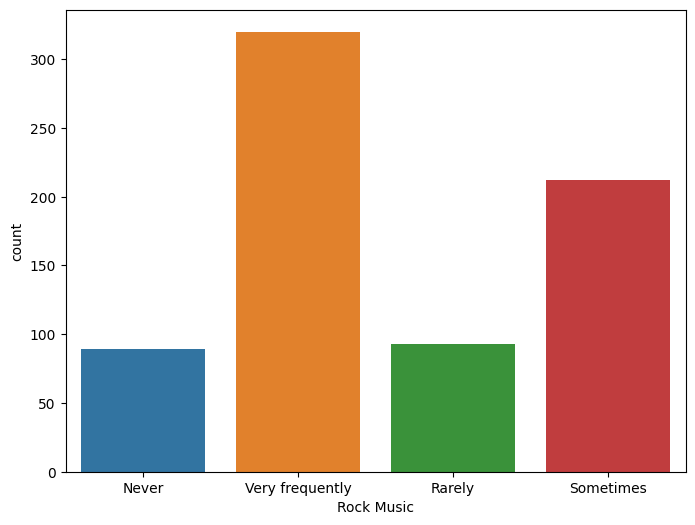

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Rock]'])
plt.xlabel('Rock Music')

Text(0.5, 0, 'Video Game Music')

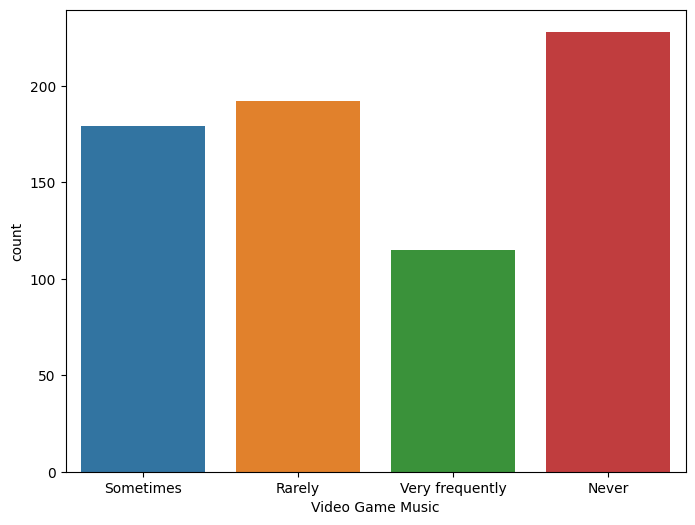

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset['Frequency [Video game music]'])
plt.xlabel('Video Game Music')

In [ ]:
#Bivariate Analysis

<ipython-input-137-af08a686fc59>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=dataset['Favgenre'], y=dataset['Age'], ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

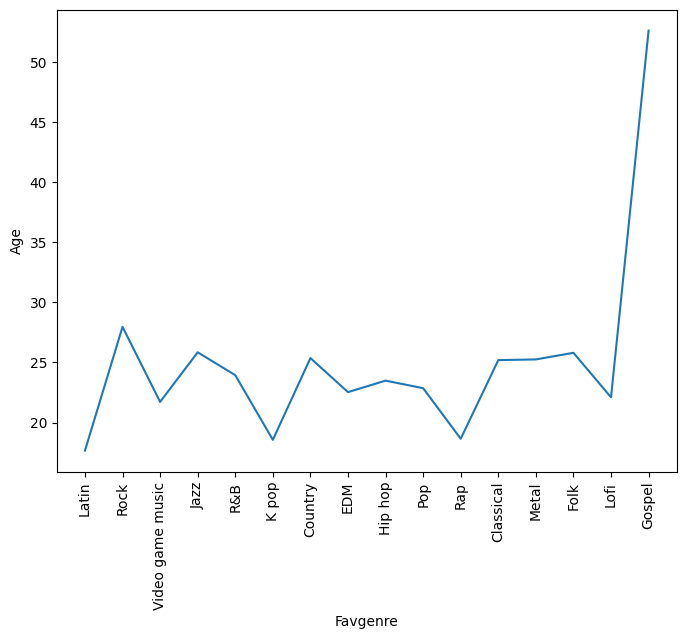

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=dataset['Favgenre'], y=dataset['Age'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

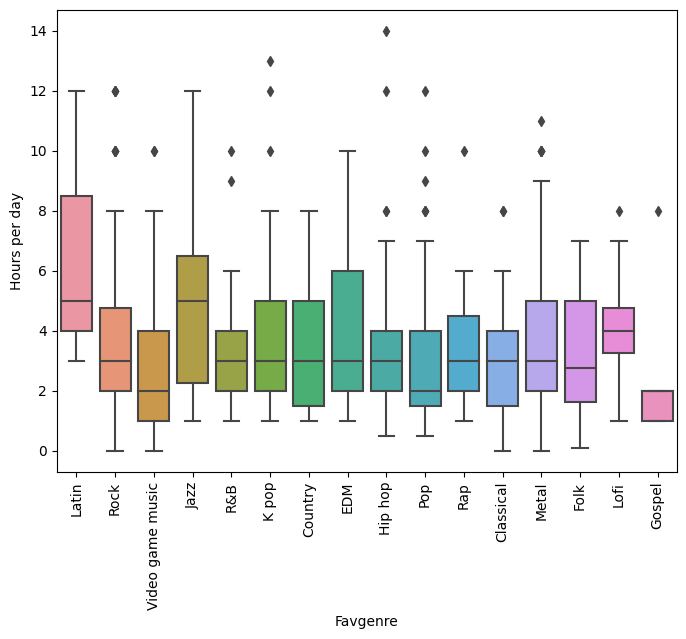

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['Favgenre'], y=dataset['Hours per day'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

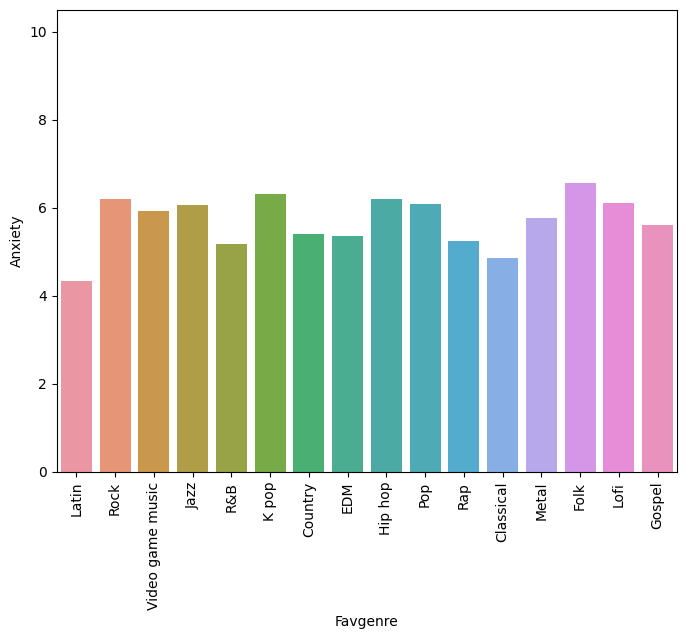

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Anxiety'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

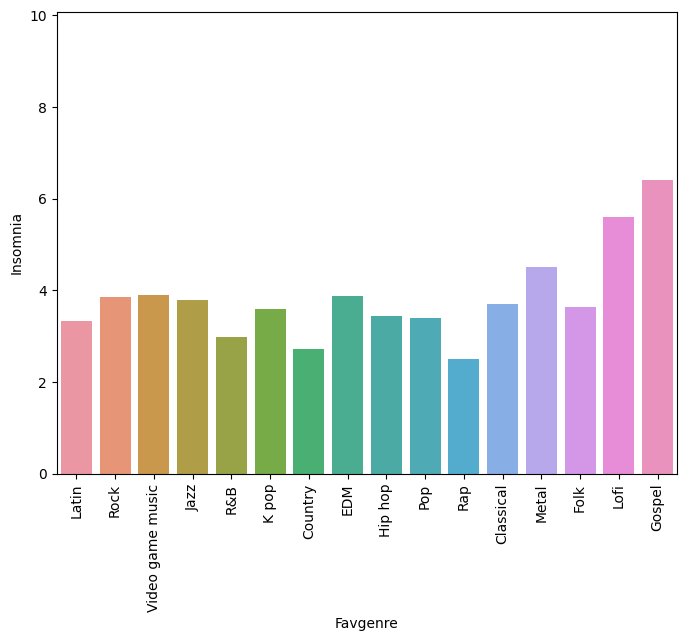

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Insomnia'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

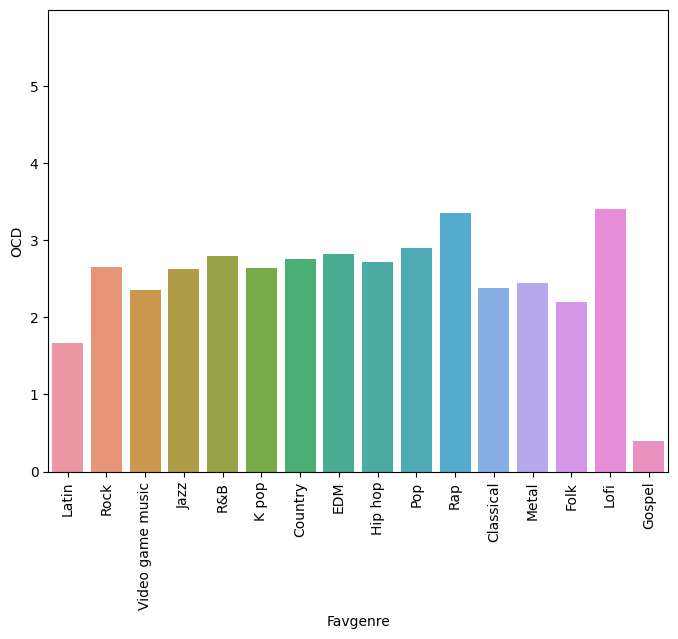

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['OCD'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

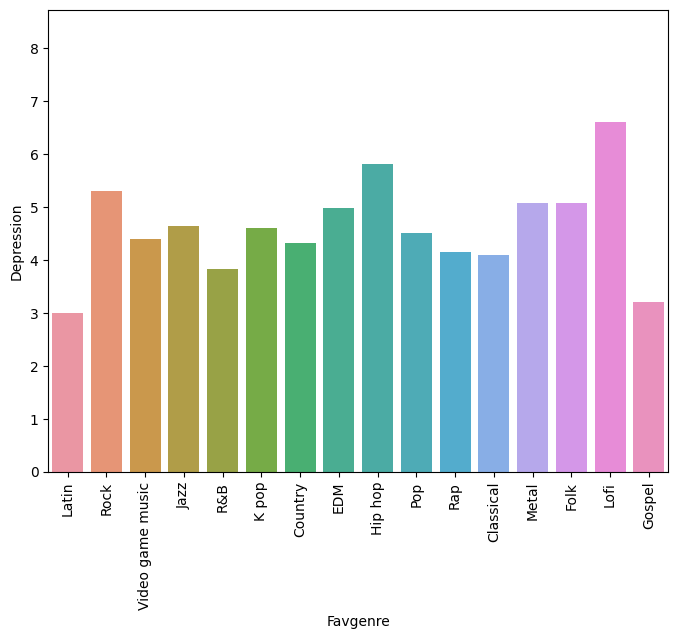

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Depression'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

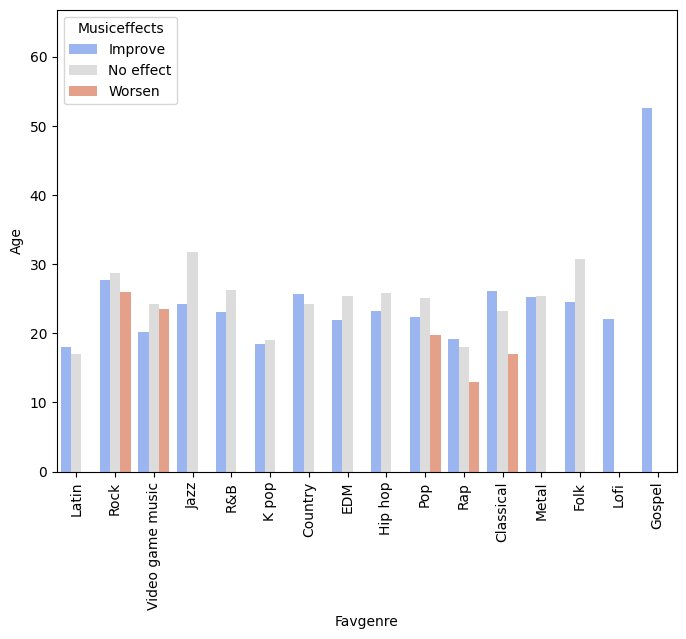

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Age'], hue=dataset['Musiceffects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

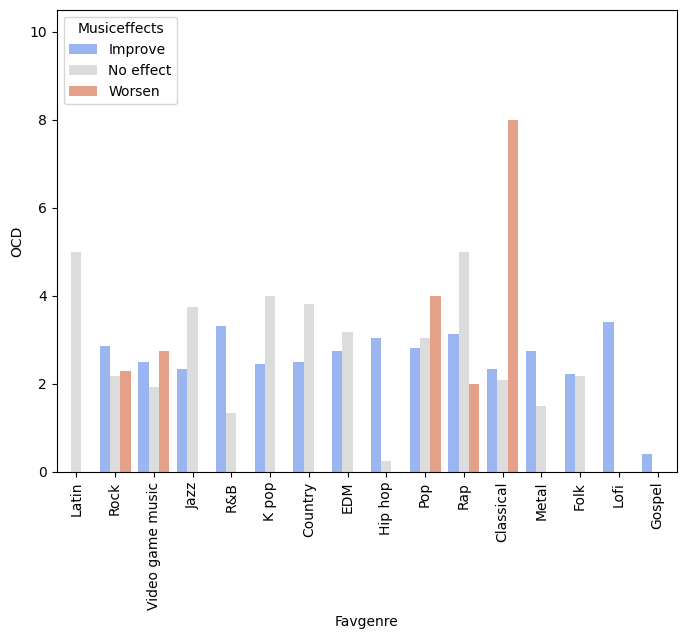

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['OCD'], hue=dataset['Musiceffects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

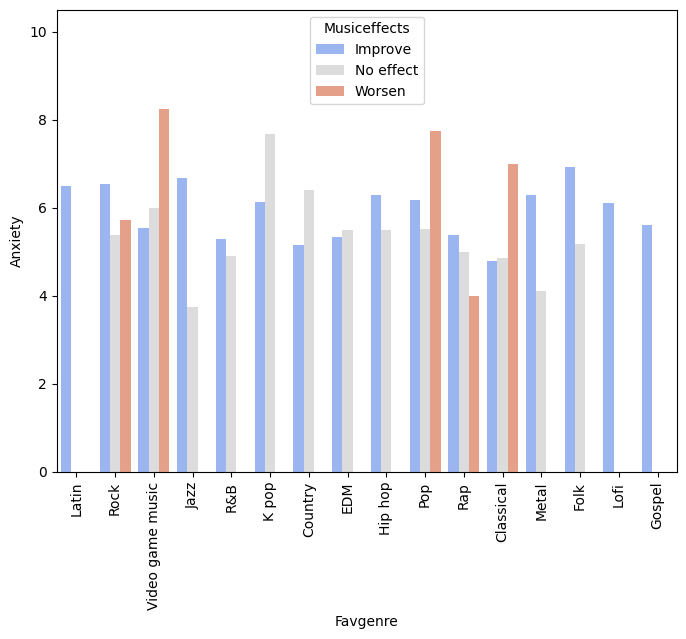

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Anxiety'], hue=dataset['Musiceffects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

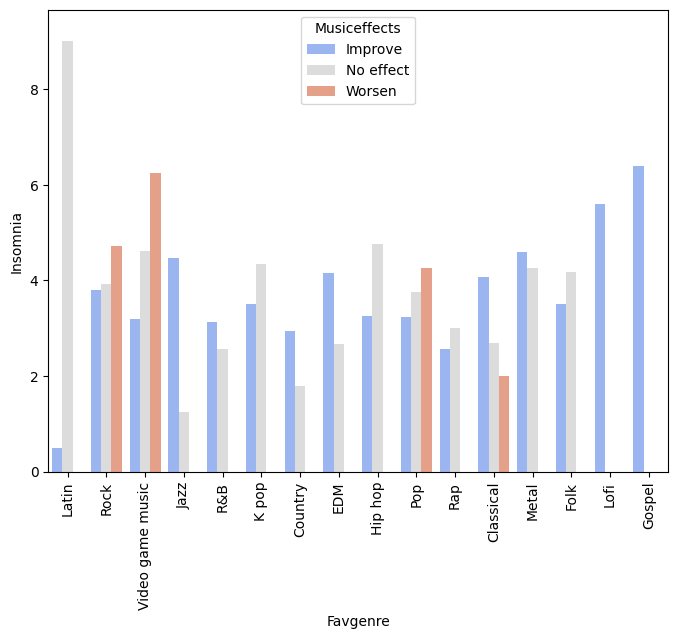

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Insomnia'], hue=dataset['Musiceffects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

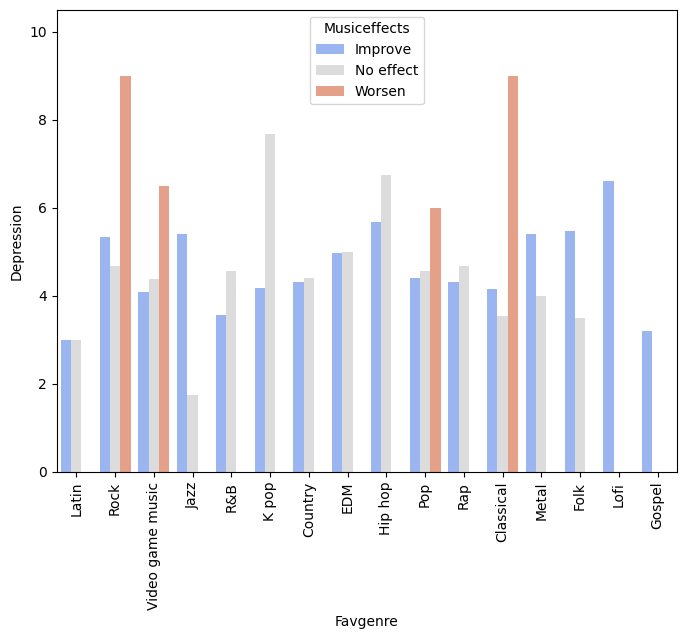

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['Favgenre'], y=dataset['Depression'], hue=dataset['Musiceffects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

In [ ]:
#Convert labels into categories codes
r = dataset.Musiceffects.astype('category')
response = dict(enumerate(r.cat.categories))
dataset['response']=r.cat.codes

#Declare and set y and X variables
y=dataset.response
X=dataset[['Anxiety','Depression','Insomnia','OCD']]

In [ ]:
#Data Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [ ]:
len(X_train)

571

In [ ]:
#Feature Scaling

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_svm = svm.SVC(kernel='rbf', C=10)

In [ ]:
#Training of classifier on training data

model_svm.fit(X_train_scaled, y_train)

#Prediction

y_pred = model_svm.predict(X_test_scaled)

#Model Accuracy

accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.734


In [ ]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Precision: 0.629
Recall: 0.734
F1 Score: 0.651


In [ ]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train3, y_train3 = X.iloc[train_index], y.iloc[train_index]
    X_test3, y_test3 = X.iloc[test_index], y.iloc[test_index]
    model_svm.fit(X_train3, y_train3)

    y_pred = model_svm.predict(X_test3)
    score = accuracy_score(y_test3, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:",mean_accuracy)

Mean Accuracy: 0.742


In [ ]:
#Implementation of Decision Tree Model

In [ ]:
#Decision Tree classifier object
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [ ]:
#Decision Tree classifier object
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [ ]:
#Training of classifier on training data
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [ ]:
#Prediction
y_pred = model_dt.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.657


In [ ]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train2, y_train2 = X.iloc[train_index], y.iloc[train_index]
    X_test2, y_test2 = X.iloc[test_index], y.iloc[test_index]

    model_dt.fit(X_train2, y_train2)

    y_pred = model_dt.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean accuracy:",mean_accuracy)

Mean accuracy: 0.674


In [ ]:
#Implementation of Random Forest
model_rf = RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [ ]:
#Prediction
y_pred = model_rf.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ",accuracy)

Accuracy:  0.734


In [ ]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Precision: 0.629
Recall: 0.734
F1 Score: 0.651


In [ ]:
# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train_k, y_train_k = X.iloc[train_index], y.iloc[train_index]
    X_test_k, y_test_k = X.iloc[test_index], y.iloc[test_index]
    model_rf.fit(X_train_k, y_train_k)

    y_pred = model_rf.predict(X_test_k)
    score = accuracy_score(y_test_k, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:",mean_accuracy)

Mean Accuracy: 0.748


([<matplotlib.axis.XTick at 0x79a7ca8aec50>,
 [Text(0, 0, 'Anxiety'),
  Text(1, 0, 'Insomnia'),
  Text(2, 0, 'Depression'),
  Text(3, 0, 'OCD')])

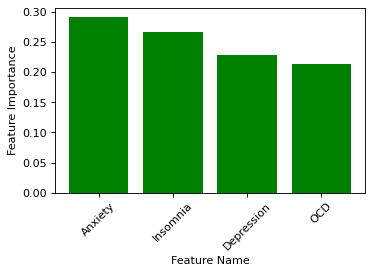

In [ ]:
plt.figure(figsize=(5, 3), dpi=80)
importance_sorted = sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True)
feature_importance = [imp for imp, _ in importance_sorted]
feature_names = [name for _, name in importance_sorted]

c_features = len(feature_importance)
plt.bar(range(c_features), feature_importance, color = "green")
plt.ylabel("Feature Importance")
plt.xlabel("Feature Name")
plt.xticks(np.arange(c_features), feature_names, rotation=45)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Ask user for anxiety, depression, insomnia, and OCD scores
anxiety = float(input("Enter anxiety score (0-10): "))
depression = float(input("Enter depression score (0-10): "))
insomnia = float(input("Enter insomnia score (0-10): "))
ocd = float(input("Enter OCD score (0-10): "))
scaler = MinMaxScaler()
scaler.fit(X_train)

# Create a numpy array with the user input
user_data = np.array([[anxiety, depression, insomnia, ocd]])

# Scale the user input using the same MinMaxScaler used in training
user_data_scaled = scaler.transform(user_data)

# Predict the favorite genre category using the trained Random Forest model
predicted_category = model_rf.predict(user_data_scaled)[0]

# Map the predicted category back to the original genre labels
predicted_genre = response[predicted_category]

# Recommend a song based on the predicted genre
if predicted_genre == 'latin':
    print("Recommended song: Despacito by Luis Fonsi")
elif predicted_genre == 'rock':
    print("Recommended song: Bohemian Rhapsody by Queen")
elif predicted_genre == 'video game music':
    print("Recommended song: Gerudo Valley Theme from The Legend of Zelda")
elif predicted_genre == 'jazz':
    print("Recommended song: Take Five by Dave Brubeck")
elif predicted_genre == 'R&B':
    print("Recommended song: Blinding Lights by The Weeknd")
elif predicted_genre == 'k pop':
    print("Recommended song: Dynamite by BTS")
elif predicted_genre == 'country':
    print("Recommended song: Wagon Wheel by Old Crow Medicine Show")
elif predicted_genre == 'EDM':
    print("Recommended song: Wake Me Up by Avicii")
elif predicted_genre == 'hip hop':
    print("Recommended song: Sicko Mode by Travis Scott")
elif predicted_genre == 'pop':
    print("Recommended song: Shape of You by Ed Sheeran")
elif predicted_genre == 'Rap':
    print("Recommended song: Lose Yourself by Eminem")
elif predicted_genre == 'classical':
    print("Recommended song: Symphony No. 9 by Ludwig van Beethoven")
elif predicted_genre == 'metal':
    print("Recommended song: Enter Sandman by Metallica")
elif predicted_genre == 'lofi':
    print("Recommended song: lofi hip hop radio - beats to relax/study to")
elif predicted_genre == 'gospel':
    print("Recommended song: Oh Happy Day by Edwin Hawkins Singers")
else:
    print("Recommended song: Sorry, no specific recommendation available for this genre.")


Enter anxiety score (0-10): 5
Enter depression score (0-10): 3
Enter insomnia score (0-10): 5
Enter OCD score (0-10): 3
Recommended song: Sorry, no specific recommendation available for this genre.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
